# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
# keras.datasets.fashion_mnist


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [8]:
dataset = keras.datasets.fashion_mnist
len(dataset.load_data()[0][1])

60000

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset.

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [15]:
X_train.shape[0]

60000

In [16]:
X_test.shape[0]

10000

In [17]:
X_train.shape[1] * X_train.shape[2]

784

In [18]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [19]:
pd.Series(y_test).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [21]:
2 ** 8

256

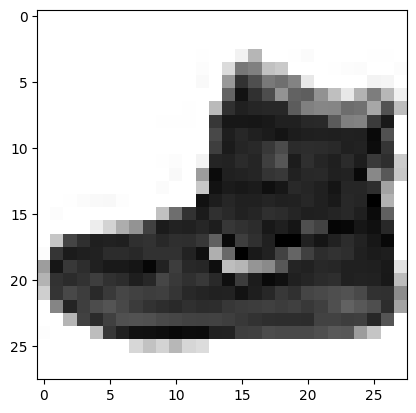

In [23]:
plt.imshow(X_train[0], cmap="binary")

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [24]:
print(X_train.min())
print(X_train.max())

0
255


In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
print(X_train.min())
print(X_train.max())

0.0
1.0


Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

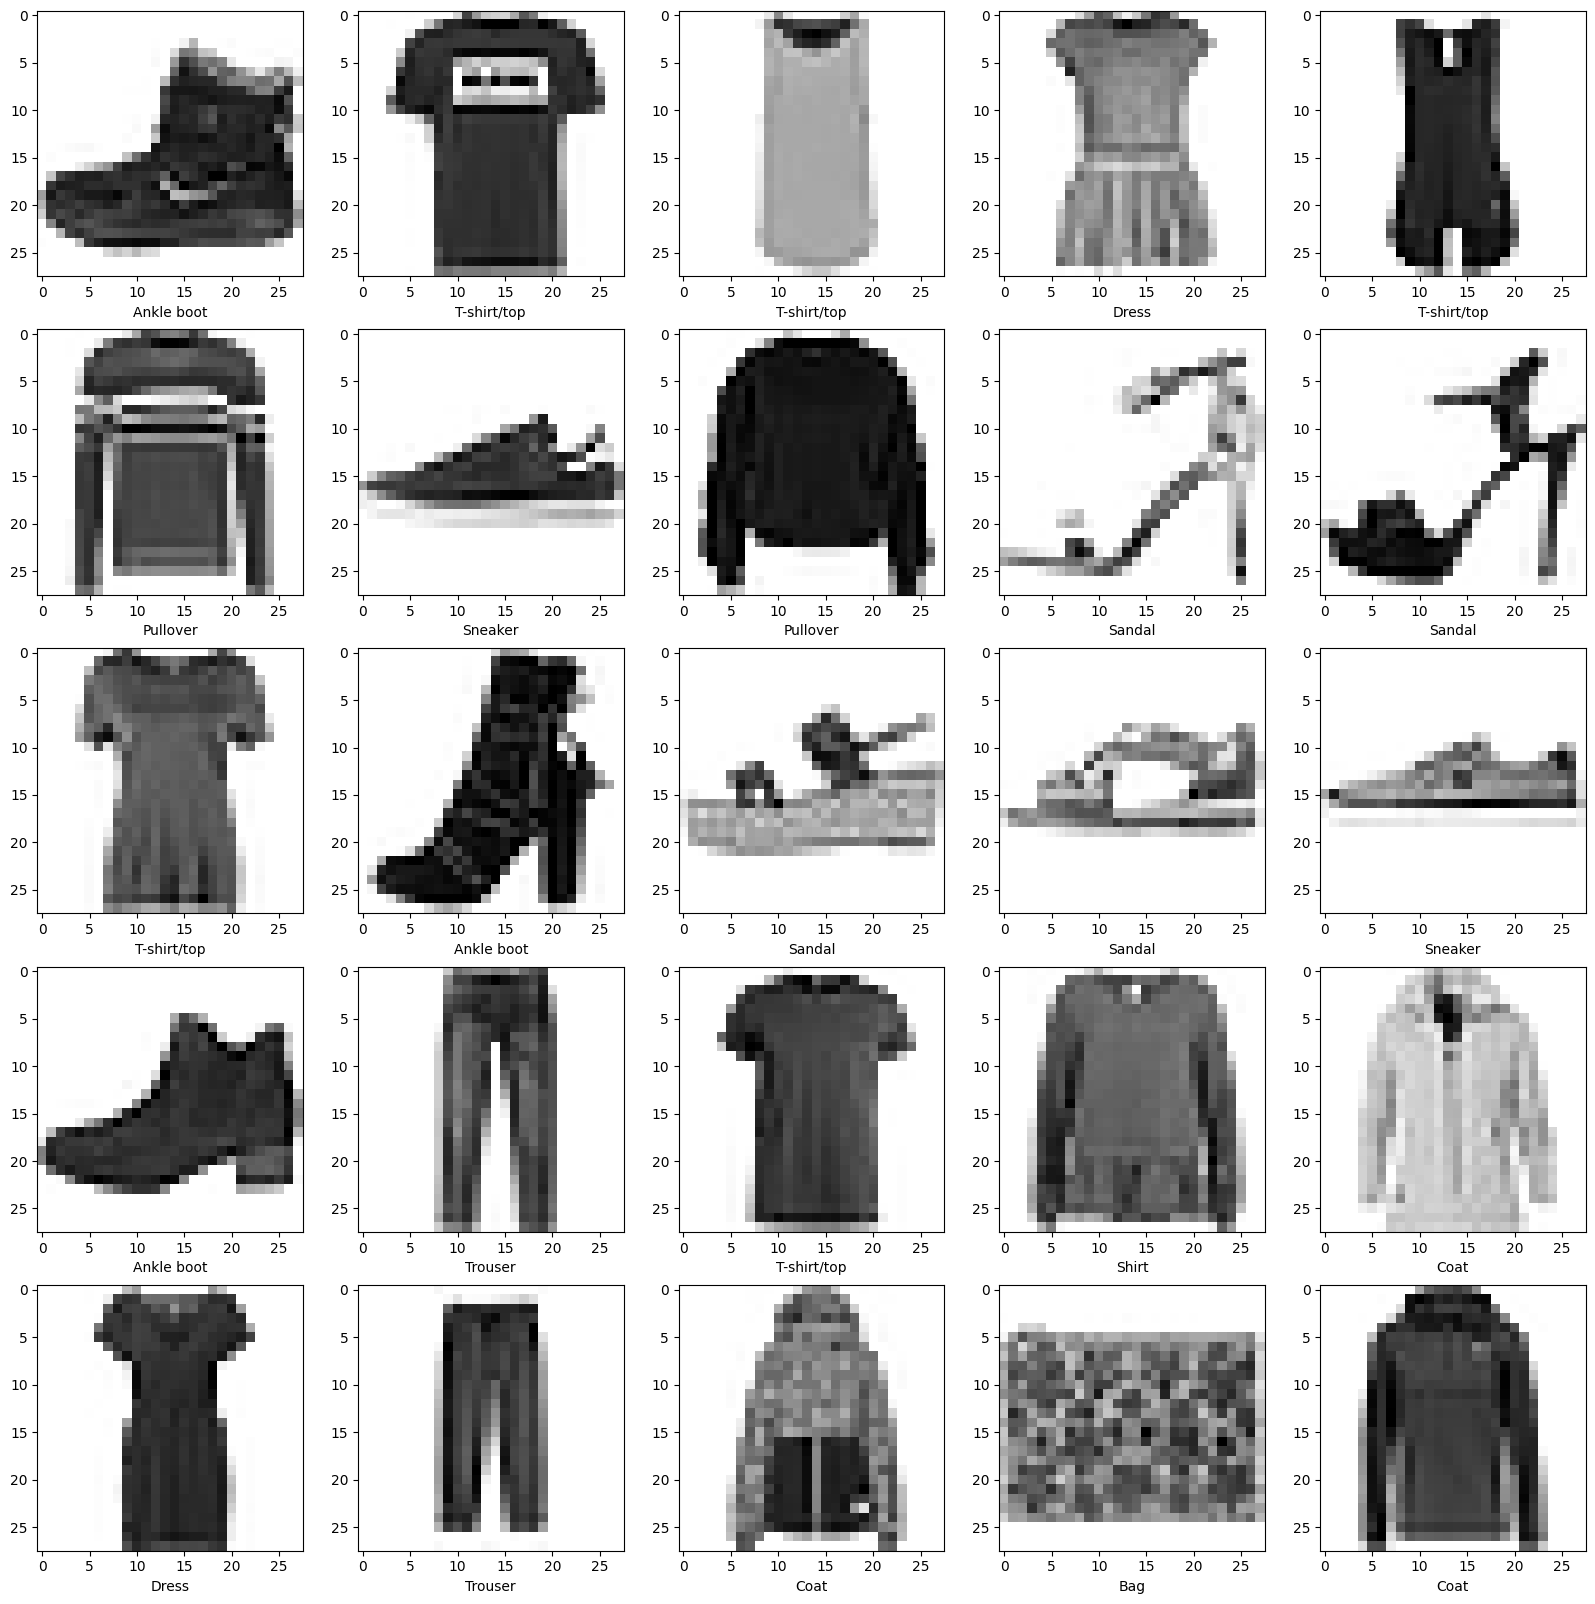

In [28]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256),
    keras.layers.Dense(128),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation="softmax"),
])

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [32]:
model.compile(optimizer="sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 238314 (930.91 KB)
Trainable params: 238

In [35]:
784 * 256 +256

200960

In [37]:
256 * 128 + 128

32896

In [38]:
128 * 32 + 32

4128

In [39]:
32 * 10 + 10

330

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [40]:
earlystopping = keras.callbacks.EarlyStopping(patience=5)

In [47]:
X_train.shape[0]*0.9/128

421.875

In [48]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs = 20,
    validation_split=0.1,
    callbacks = [earlystopping]
)

Epoch 1/20


422/422 [==============================] - 4s 6ms/step - loss: 0.8548 - accuracy: 0.7093 - val_loss: 0.5993 - val_accuracy: 0.7955
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5870 - accuracy: 0.7956 - val_loss: 0.5332 - val_accuracy: 0.8143
Epoch 3/20
422/422 [==============================] - 3s 6ms/step - loss: 0.5368 - accuracy: 0.8134 - val_loss: 0.4918 - val_accuracy: 0.8283
Epoch 4/20
422/422 [==============================] - 2s 6ms/step - loss: 0.5099 - accuracy: 0.8225 - val_loss: 0.4726 - val_accuracy: 0.8315
Epoch 5/20
422/422 [==============================] - 2s 6ms/step - loss: 0.4938 - accuracy: 0.8279 - val_loss: 0.4797 - val_accuracy: 0.8245
Epoch 6/20
422/422 [==============================] - 2s 6ms/step - loss: 0.4814 - accuracy: 0.8317 - val_loss: 0.4573 - val_accuracy: 0.8355
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.4712 - accuracy: 0.8354 - val_loss: 0.4462 - val_accuracy: 0.8410
Epoc

<Axes: >

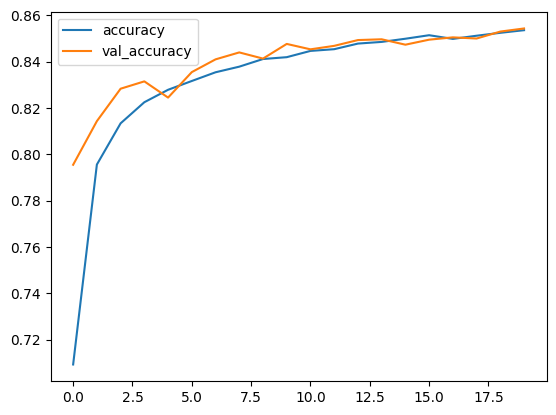

In [49]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [52]:
X_test.shape[0]/32

312.5

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.8393


[0.45756131410598755, 0.8392999768257141]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [53]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.47966000e-06, 4.45286531e-07, 1.61263833e-05, ...,
        1.26060635e-01, 5.62328706e-03, 8.15667450e-01],
       [1.35842041e-04, 1.02237129e-06, 9.62843895e-01, ...,
        1.45353096e-11, 1.73025583e-05, 5.32571660e-11],
       [4.15636932e-05, 9.99908328e-01, 1.46681732e-05, ...,
        2.58063579e-08, 2.67353215e-07, 7.66181840e-11],
       ...,
       [6.11236058e-02, 1.31549450e-06, 3.40255210e-03, ...,
        2.43100803e-05, 7.48596251e-01, 1.74393915e-06],
       [2.12952659e-06, 9.99552429e-01, 5.55173665e-06, ...,
        1.05767947e-06, 1.17932544e-07, 1.04729395e-06],
       [1.66282451e-04, 3.74108437e-04, 6.39020873e-04, ...,
        2.31144670e-02, 9.04503185e-03, 1.69618218e-03]], dtype=float32)

In [56]:
np.round(y_pred[0], 3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.053, 0.   , 0.126, 0.006,
       0.816], dtype=float32)

In [57]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [61]:
np.round(y_pred[0], 3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.053, 0.   , 0.126, 0.006,
       0.816], dtype=float32)

In [58]:
y_pred_labels[0]

9

In [59]:
class_names[y_pred_labels[0]]

'Ankle boot'

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [62]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

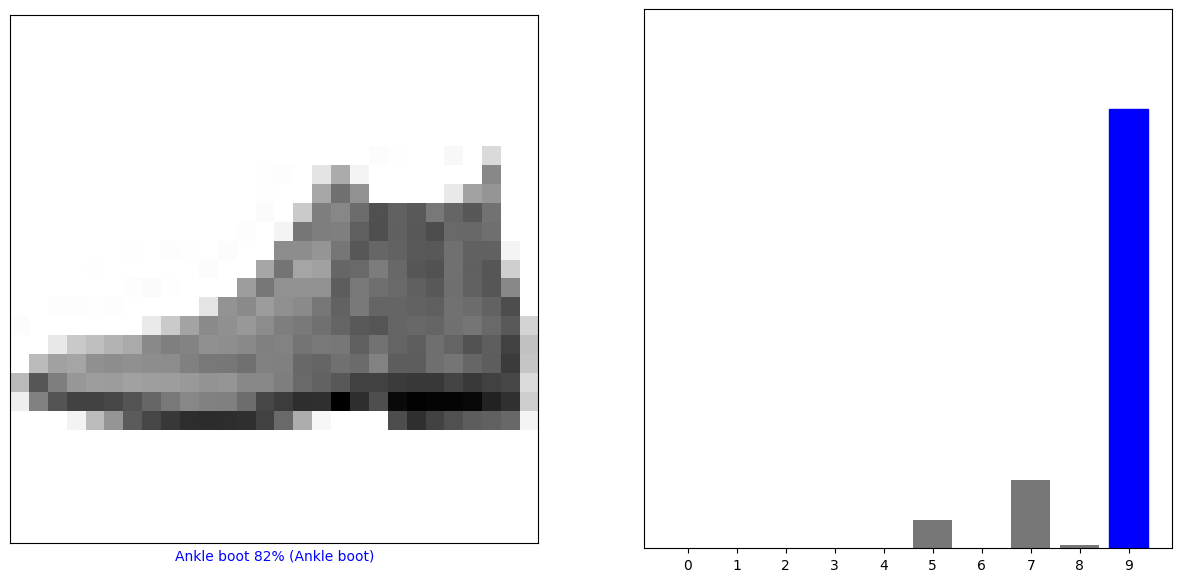

In [63]:
i = 0
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i], y_test)

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

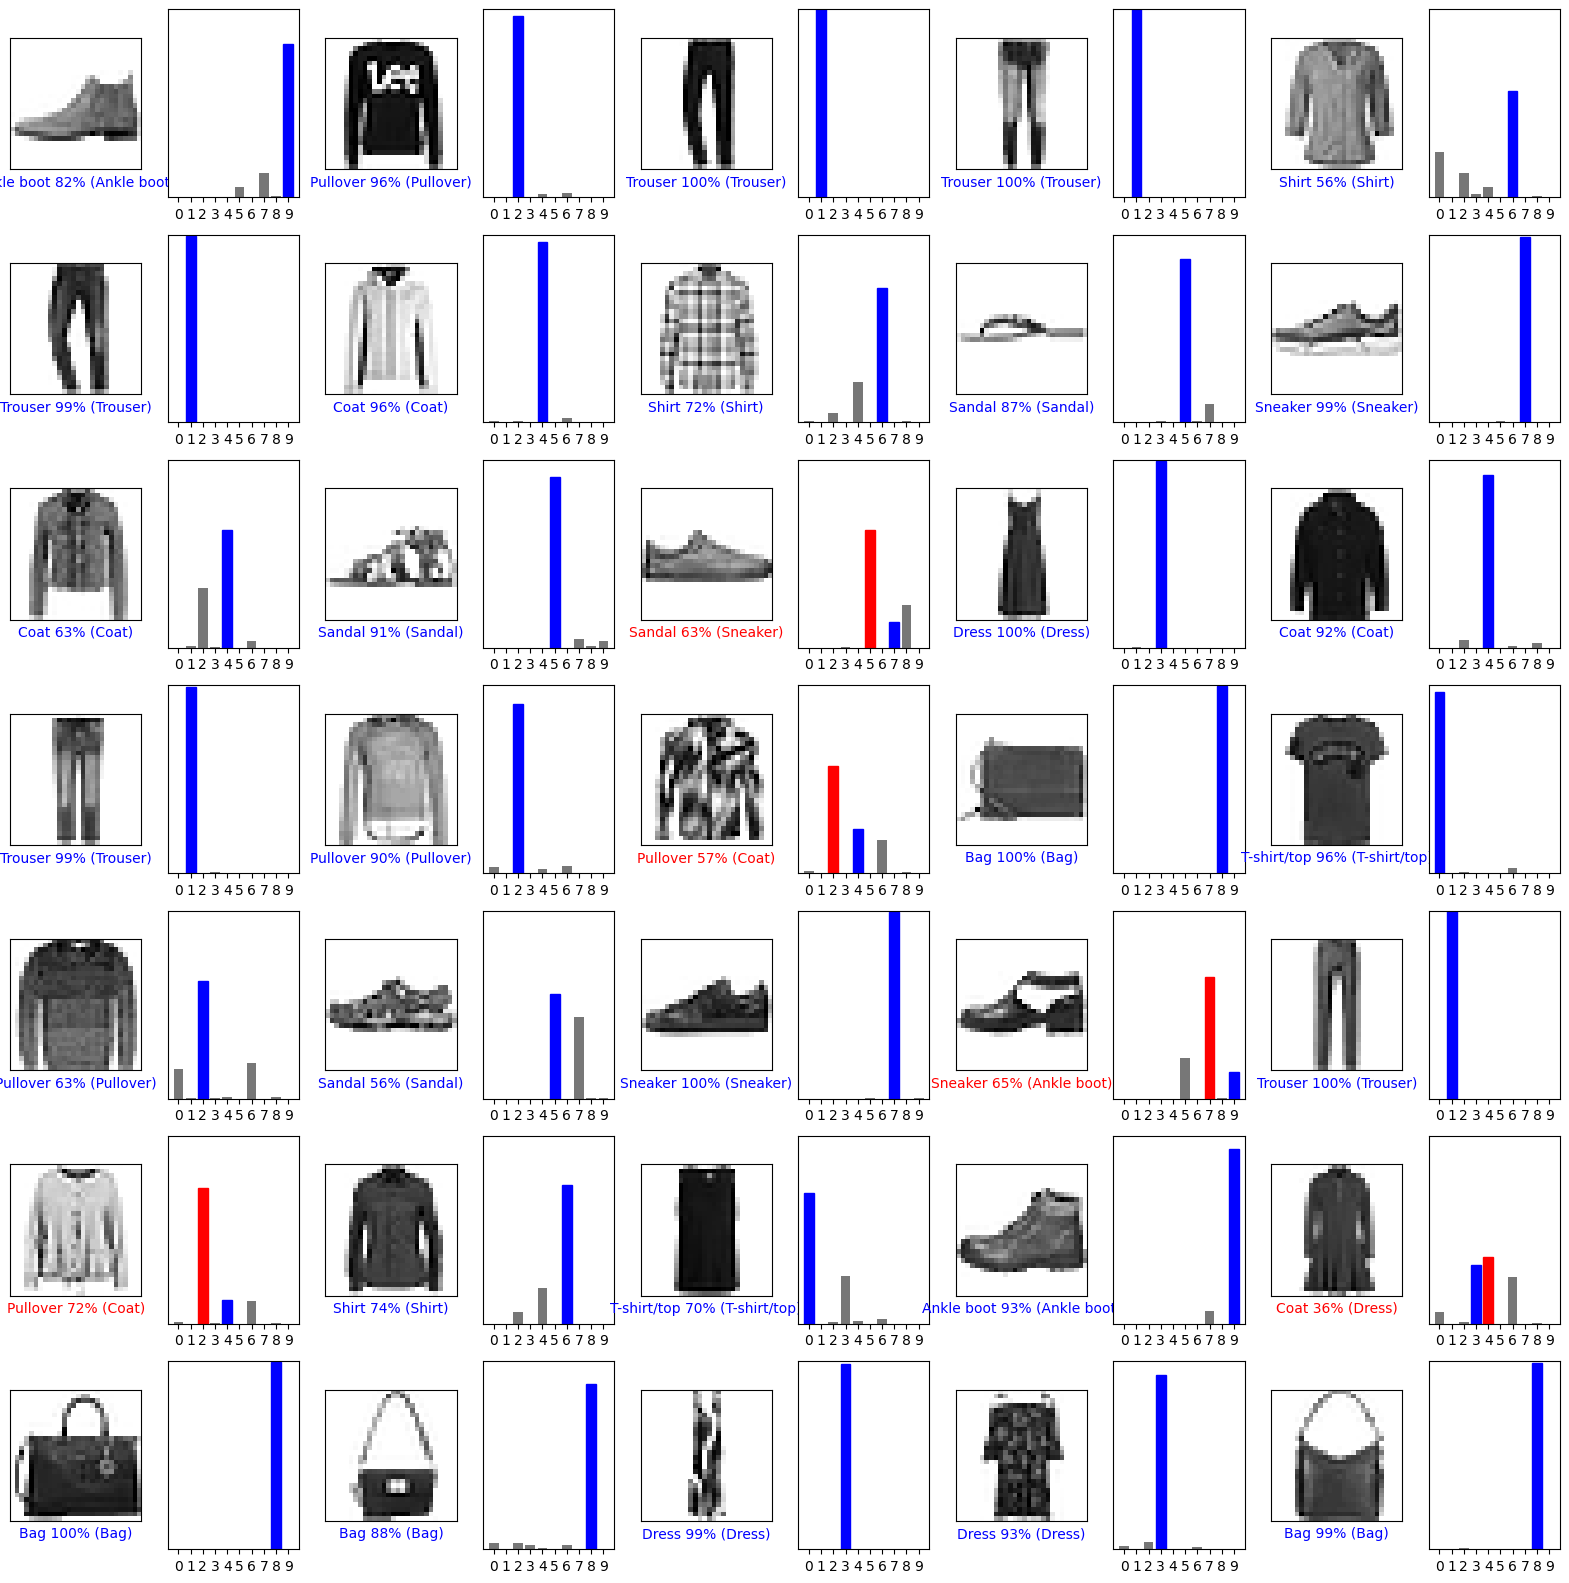

In [64]:
n_rows = 7
n_cols = 5
n_img = n_rows * n_cols

plt.figure(figsize=(20,20))

for i in range(n_img):
    plt.subplot(n_rows, n_cols*2, 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)

Evalúa tu modelo con una matriz de confusión e interprétala.

<Axes: >

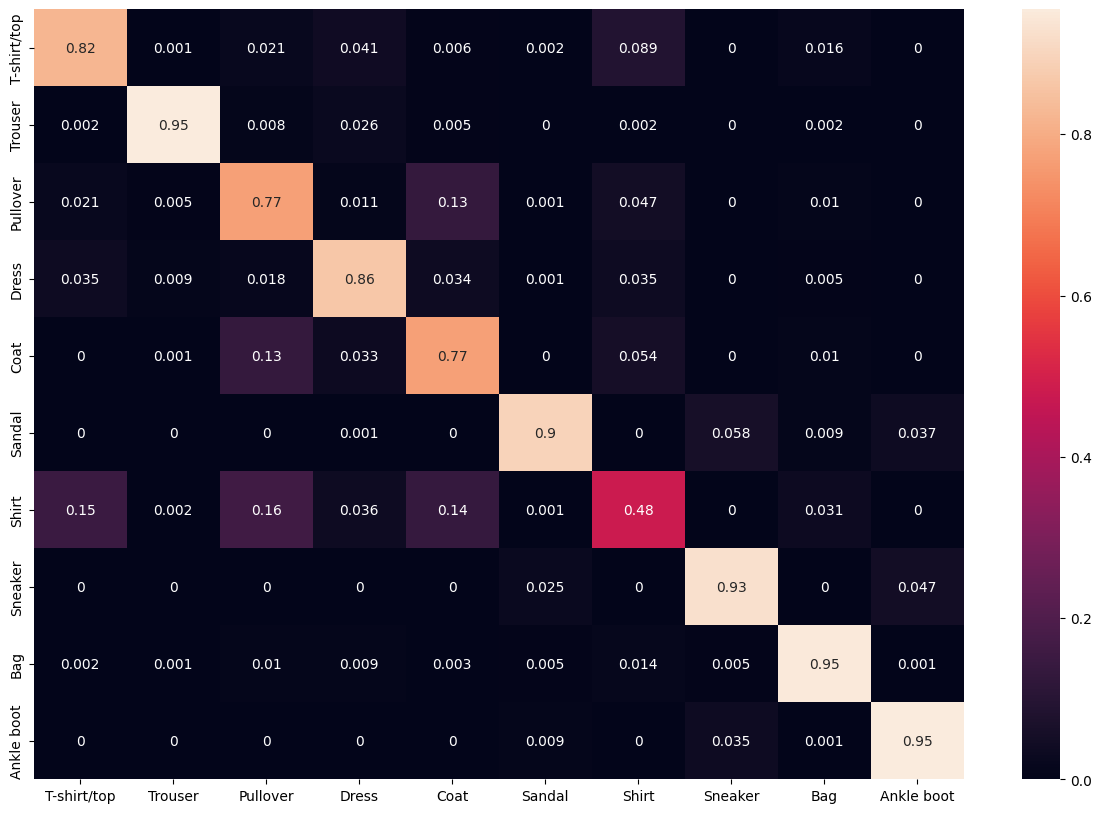

In [66]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred_labels, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.69      0.77      0.73      1000
           3       0.85      0.86      0.85      1000
           4       0.71      0.77      0.74      1000
           5       0.95      0.90      0.92      1000
           6       0.67      0.48      0.56      1000
           7       0.90      0.93      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [68]:
class_names[np.argmax(model.predict(X_test[47:48]))]

1/1 [==============================] - 0s 26ms/step


'Trouser'